***

In [1]:
#library
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statistics as st
from collections import Counter

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Encoder
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split

#Ignore warning
import warnings
warnings.filterwarnings('ignore')

#Set max column
pd.set_option('display.max_columns', None)

#Set max rows
pd.set_option('display.max_rows', 500)



In [2]:
# Load dataset
df_SF = pd.read_csv('PHL_OPA_Properties_Clean.csv',index_col= 'Unnamed: 0')
df_SF.head()

,basements,building_code_description,category_code_description,central_air,depth,exterior_condition,fireplaces,frontage,garage_spaces,garage_type,interior_condition,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,parcel_shape,state_code,street_designation,topography,total_area,total_livable_area,type_heater,view_type,year_built,zip_code,zoning,lat,lng
0,D,ROW W/GAR 3 STY MASONRY,Single Family,N,49.0,5.0,0.0,15.90,1.0,B,5.0,186800.0,2.0,4.0,7.0,0.0,E,1001.0,ST,F,779.0,1650.0,H,I,1920.0,191475425,RSA5,-75.146866,39.931278
1,D,ROW 3 STY MASONRY,Single Family,Y,49.0,2.0,0.0,15.90,0.0,0,2.0,341600.0,1.0,3.0,0.0,0.0,E,1001.0,ST,F,779.1,1203.0,H,I,1920.0,191475425,RSA5,-75.146921,39.931286
2,D,ROW 3 STY MASONRY,Single Family,N,49.0,4.0,0.0,14.80,0.0,0,4.0,226200.0,1.0,4.0,0.0,2.0,E,1001.0,ST,F,725.2,1482.0,H,I,1920.0,191475425,RSA5,-75.146971,39.931292
3,D,ROW 3 STY MASONRY,Single Family,Y,100.0,4.0,0.0,14.33,0.0,0,4.0,241500.0,2.0,4.0,8.0,2.0,E,1001.0,ST,F,1433.0,2049.0,A,I,1920.0,191475425,RSA5,-75.147034,39.931230
4,C,ROW 3 STY MASONRY,Single Family,N,100.0,4.0,0.0,15.00,0.0,0,4.0,237000.0,2.0,4.0,0.0,3.0,E,1001.0,ST,F,1500.0,1155.0,H,I,1920.0,191475425,RSA5,-75.147087,39.931236


In [3]:
df_SF.drop(columns=['exterior_condition','zip_code','lat','lng'],inplace= True)

In [4]:
df_SF.shape

(400560, 25)

# Data preprocessing

## Encoding

Untuk dapat menggunakan semua fitur telah dipilih, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal dengan menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana dapat diaplikasikan pada pipeline model.

In [5]:
mapping = [{'col':'basements', 'mapping':{'0': 0, 'A':10, 'B':9, 'C':8, 'D':7, 'E':6, 'F':5, 'G':4, 'H':3, 'I':2, 'J':1}}]
ordinal = ce.OrdinalEncoder(mapping=mapping)

# Encoding
transformer = ColumnTransformer([
    ('Ordinal', ordinal,['basements']),
    ('binary_simple', ce.BinaryEncoder(), ['building_code_description','category_code_description',
    'garage_type','parcel_shape','street_designation','topography','type_heater','view_type','zoning']),
    ('onehot', OneHotEncoder(drop='first'), ['central_air'])
    
], remainder='passthrough')

## Train Test Split

In [6]:
X = df_SF.drop(columns=['market_value'])
y = df_SF['market_value']

# Splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.2,
    random_state=2020
)

Cek Encoding

In [7]:
# .fit and .transform method
X_train_preprocessed = transformer.fit_transform(X_train)

#.transform method
X_test_preprocessed = transformer.transform(X_test) 

In [8]:
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed)
pd.set_option('display.max_columns', None)
X_train_preprocessed_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,58.00,0.0,14.00,0.0,4.0,1.0,3.0,6.0,2.0,1001.0,812.00,1120.0,1929.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,104.00,0.0,19.00,0.0,4.0,1.0,4.0,7.0,2.0,1001.0,1992.00,1664.0,1925.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,106.25,0.0,24.25,1.0,4.0,1.0,3.0,6.0,2.0,1001.0,2576.56,1320.0,1950.0
3,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,69.25,0.0,15.00,0.0,4.0,1.0,3.0,3.0,2.0,1001.0,1038.75,1290.0,1940.0
4,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,75.00,0.0,15.50,0.0,4.0,1.0,3.0,6.0,0.0,1001.0,1162.50,1485.0,1910.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320443,8.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,93.25,0.0,16.78,1.0,4.0,1.0,4.0,7.0,0.0,1001.0,1564.73,1502.0,1956.0
320444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,47.00,0.0,14.16,0.0,4.0,1.0,3.0,6.0,2.0,1001.0,665.52,804.0,1925.0
320445,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,100.00,0.0,20.00,0.0,4.0,0.0,0.0,0.0,2.0,1001.0,2000.00,1219.0,1955.0
320446,7.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,100.00,0.0,19.00,2.0,4.0,0.0,0.0,0.0,3.0,1001.0,1900.00,2400.0,1930.0


In [9]:
X_train_preprocessed_df.dropna()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,58.00,0.0,14.00,0.0,4.0,1.0,3.0,6.0,2.0,1001.0,812.00,1120.0,1929.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,104.00,0.0,19.00,0.0,4.0,1.0,4.0,7.0,2.0,1001.0,1992.00,1664.0,1925.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,106.25,0.0,24.25,1.0,4.0,1.0,3.0,6.0,2.0,1001.0,2576.56,1320.0,1950.0
3,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,69.25,0.0,15.00,0.0,4.0,1.0,3.0,3.0,2.0,1001.0,1038.75,1290.0,1940.0
4,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,75.00,0.0,15.50,0.0,4.0,1.0,3.0,6.0,0.0,1001.0,1162.50,1485.0,1910.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320443,8.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,93.25,0.0,16.78,1.0,4.0,1.0,4.0,7.0,0.0,1001.0,1564.73,1502.0,1956.0
320444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,47.00,0.0,14.16,0.0,4.0,1.0,3.0,6.0,2.0,1001.0,665.52,804.0,1925.0
320445,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,100.00,0.0,20.00,0.0,4.0,0.0,0.0,0.0,2.0,1001.0,2000.00,1219.0,1955.0
320446,7.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,100.00,0.0,19.00,2.0,4.0,0.0,0.0,0.0,3.0,1001.0,1900.00,2400.0,1930.0


# Modelling

In [10]:
# Modelling
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV, KFold
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

from sklearn import metrics
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, classification_report, f1_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score


**Choose a Benchmark Model**

In [11]:
# Define algoritma yang digunakan
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)


# Kandidat algoritma
models = [log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []


# Mencari algoritma terbaik berdasarkan nilai MAE
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train_preprocessed, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train_preprocessed, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())


KeyboardInterrupt: 

In [12]:
# Evaluasi hasil dari 4 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE
0,KNN Regressor,-29778.604334,157.870875,-14541.827446,84.103066
1,DecisionTree Regressor,-29283.172971,602.913596,-10105.741249,223.838712
2,RandomForest Regressor,-21426.589764,429.211848,-8216.502621,175.145952
3,XGBoost Regressor,-25632.537120,247.971923,-15050.974979,90.987304


Terdapat perbedaan cukup signifikan antara nilai RMSE dan MAE, di mana nilai RMSE lebih tinggi karena nilai error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Maka dari itu nilai RMSE yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

- Berdasarkan nilai RMSE, RandomForest Regressor adalah model terbaik. Sedangkan jika berdasarkan nilai MAE, juga RandomForest Regressor memiliki nilai paling rendah.
- Selanjutnya, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu DecisionTree Regressor dan RandomForest Regressor. 

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model DecisionTree Regressor dan RandomForest Regressor.

In [13]:
# Benchmark 2 model terbaik
models = {
    'DecisionTree': DecisionTreeRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae}, index=models.keys())
score_before_tuning

,RMSE,MAE
DecisionTree,27480.029713,9203.765978
RandomForest,19944.273157,7560.690845


- Ketika dilakukan prediksi pada test set, performa RandomForest Regressor lebih baik. Hal ini dapat dilihat dari nilai RMSE dan MAE yang lebih kecil dari DecisionTree Regressor.


**Hyperparameter Tuning**

Karena model RandomForest Regressor memiliki performa yang sedikit lebih baik dari DecisionTree Regressor, maka selanjutnya kita akan menggunakan model RandomForest Regressor ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model RandomForest Regressor dengan harapan dapat meningkatkan performa model.

Untuk panduan tuning model RandomForest Regressor, dapat merujuk ke [Random Forest: Hyperparameters](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74).

In [47]:
# Random forest

# Number of trees in random forest
n_estimators = list(np.arange(100, 2000, 100))

# Number of features to consider at every split
max_features = list(np.arange(2, 9, 1))

# Maximum number of levels in tree
max_depth = list(np.arange(20, 101, 1))

# Minimum number of samples required to split a node
min_samples_split = list(np.arange(2, 21, 1))

# Minimum number of samples required at each leaf node
min_samples_leaf = list(np.arange(1, 21, 1))


hyperparam_space_rf = {
    'model__n_estimators': n_estimators,
    'model__max_features': max_features,
    'model__max_depth': max_depth,
    'model__min_samples_split': min_samples_split,
    'model__min_samples_leaf': min_samples_leaf,
}


In [15]:
# Benchmark model dengan hyperparameter tuning
rf = RandomForestRegressor(random_state=1)

# Membuat algorithm chains
estimator_rf = Pipeline([
        ('preprocessing', transformer),
        ('model', rf)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_rf = RandomizedSearchCV(
    estimator_rf, 
    param_distributions = hyperparam_space_rf,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [16]:
# Fitting data training untuk mencari parameter terbaik
random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Ordinal',
                                                                               OrdinalEncoder(mapping=[{'col': 'basements',
                                                                                                        'mapping': {'0': 0,
                                                                                                                    'A': 10,
                                                                                                                    'B': 9,
                                                                                                                    'C': 8,
                                                                  

In [17]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE
pd.DataFrame(random_rf.cv_results_).sort_values(by='rank_test_neg_root_mean_squared_error').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error
12,61.385934,0.579036,1.153943,0.043080,106,8,1,7,10,"{'model__n_estimators': 106, 'model__min_sampl...",-45346.890057,-44434.808676,-45513.952499,-45679.512794,-45457.938972,-45286.620600,439.228873,1,-31586.902384,-31003.603238,-31825.916196,-31847.819160,-31822.679301,-31617.384056,321.368372,1
39,89.743514,0.651552,1.603916,0.041684,188,14,17,6,10,"{'model__n_estimators': 188, 'model__min_sampl...",-46217.388790,-45620.443103,-46320.235478,-46716.274419,-46378.490934,-46250.566545,356.723576,2,-32323.028306,-31952.189950,-32469.227409,-32656.376172,-32641.562253,-32408.476818,258.833034,2
21,91.573626,0.426376,1.467222,0.038411,172,5,2,7,9,"{'model__n_estimators': 172, 'model__min_sampl...",-46989.001899,-46259.447721,-46900.660462,-47331.140342,-46956.722805,-46887.394646,348.291255,3,-33030.313666,-32564.743639,-33066.187304,-33258.217821,-33234.618905,-33030.816267,249.688622,3
2,69.517956,0.598717,1.390515,0.059071,150,6,19,5,10,"{'model__n_estimators': 150, 'model__min_sampl...",-47093.988917,-46549.000926,-47365.482931,-47715.934120,-47275.731281,-47200.027635,383.235172,4,-33080.737791,-32849.768941,-33460.067417,-33575.102749,-33455.608662,-33284.257112,273.883876,4
8,66.867996,0.481969,1.250803,0.059576,136,10,13,6,9,"{'model__n_estimators': 136, 'model__min_sampl...",-47660.004508,-46992.158579,-47700.243733,-48148.316806,-47756.815076,-47651.507740,372.853213,5,-33656.024198,-33226.404882,-33789.965914,-33968.083931,-33919.867932,-33712.069371,266.008506,5


In [18]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan MAE
pd.DataFrame(random_rf.cv_results_).sort_values(by='rank_test_neg_mean_absolute_error').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error
12,61.385934,0.579036,1.153943,0.043080,106,8,1,7,10,"{'model__n_estimators': 106, 'model__min_sampl...",-45346.890057,-44434.808676,-45513.952499,-45679.512794,-45457.938972,-45286.620600,439.228873,1,-31586.902384,-31003.603238,-31825.916196,-31847.819160,-31822.679301,-31617.384056,321.368372,1
39,89.743514,0.651552,1.603916,0.041684,188,14,17,6,10,"{'model__n_estimators': 188, 'model__min_sampl...",-46217.388790,-45620.443103,-46320.235478,-46716.274419,-46378.490934,-46250.566545,356.723576,2,-32323.028306,-31952.189950,-32469.227409,-32656.376172,-32641.562253,-32408.476818,258.833034,2
21,91.573626,0.426376,1.467222,0.038411,172,5,2,7,9,"{'model__n_estimators': 172, 'model__min_sampl...",-46989.001899,-46259.447721,-46900.660462,-47331.140342,-46956.722805,-46887.394646,348.291255,3,-33030.313666,-32564.743639,-33066.187304,-33258.217821,-33234.618905,-33030.816267,249.688622,3
2,69.517956,0.598717,1.390515,0.059071,150,6,19,5,10,"{'model__n_estimators': 150, 'model__min_sampl...",-47093.988917,-46549.000926,-47365.482931,-47715.934120,-47275.731281,-47200.027635,383.235172,4,-33080.737791,-32849.768941,-33460.067417,-33575.102749,-33455.608662,-33284.257112,273.883876,4
8,66.867996,0.481969,1.250803,0.059576,136,10,13,6,9,"{'model__n_estimators': 136, 'model__min_sampl...",-47660.004508,-46992.158579,-47700.243733,-48148.316806,-47756.815076,-47651.507740,372.853213,5,-33656.024198,-33226.404882,-33789.965914,-33968.083931,-33919.867932,-33712.069371,266.008506,5


In [19]:
# Cek skor dan params terbaik
print('RandomForest')
print('Best_score:', random_rf.best_score_)
print('Best_params:', random_rf.best_params_)

RandomForest
Best_score: -45286.62059960641
Best_params: {'model__n_estimators': 106, 'model__min_samples_split': 8, 'model__min_samples_leaf': 1, 'model__max_features': 7, 'model__max_depth': 10}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model RandomForestRegressor dan hyperparameter terpilih.

In [20]:
# Model RandomForest Regressor
model = {'RandomForest': RandomForestRegressor(random_state=1)}

# Define model terhadap estimator terbaik
rf_tuning = random_rf.best_estimator_

# Fitting model
rf_tuning.fit(X_train, y_train)

# Predict test set
y_pred_rf_tuning = rf_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuning))
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_rf_tuning, 'MAE': mae_rf_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE
RandomForest,45594.629906,31710.173943


**Performance Comparison**

Perbandingan performa model RandomForestRegressor sebelum dan sesudah dilakukan hyperparameter tuning.

In [21]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['RandomForest']).T

,RMSE,MAE
RandomForest,19944.273157,7560.690845


In [22]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE
RandomForest,45594.629906,31710.173943


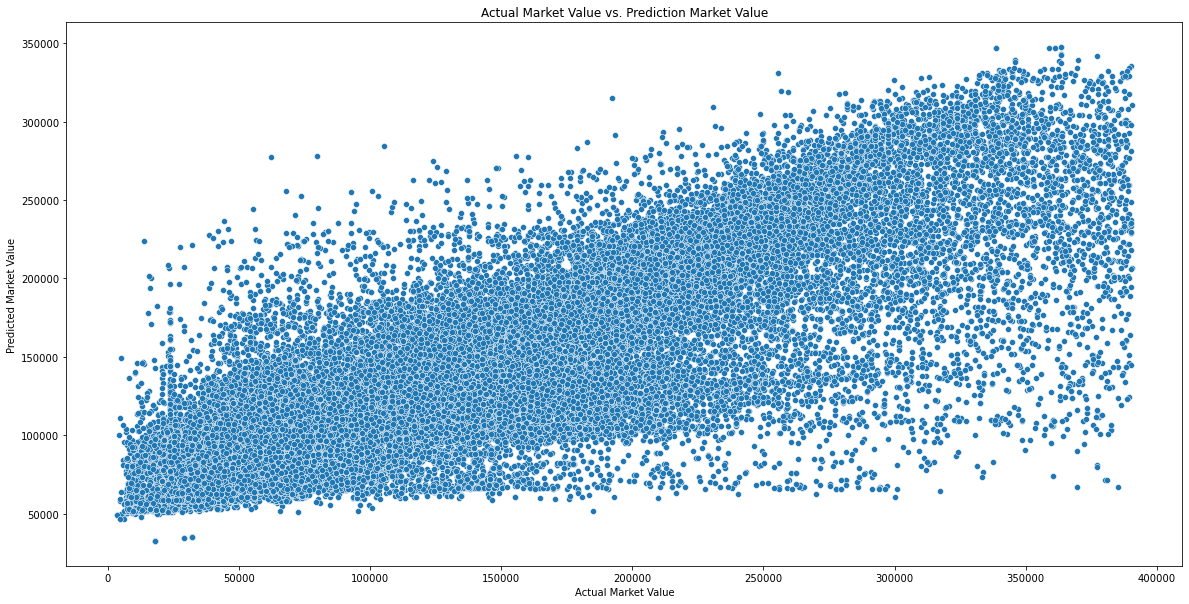

In [30]:
plt.figure(figsize=(20,10))
plot = sns.scatterplot(x=y_test, y=y_pred_rf_tuning).set(title='Actual Market Value vs. Prediction Market Value', 
                                               xlabel='Actual Market Value', 
                                               ylabel='Predicted Market Value');

Adanya nilai-nilai error yang besar membuat perbedaan yang cukup signifikan antara nilai RMSE dan MAE. Hal ini dapat tergambarkan pula pada plot di atas, di mana terdapat Market Value aktual yang rendah tapi diprediksi jauh lebih tinggi (overestimation), dan juga sebaliknya (underestimation). Akan tetapi, nilai MAPE yang didapat, yaitu sekitar 28.9% menjadikan model ini dapat dikategorikan ke dalam 'reasonable forecasting' (Lewis, 1982)

*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*

**Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (price), kita dapat mengeceknya melalui function feature_importances_.

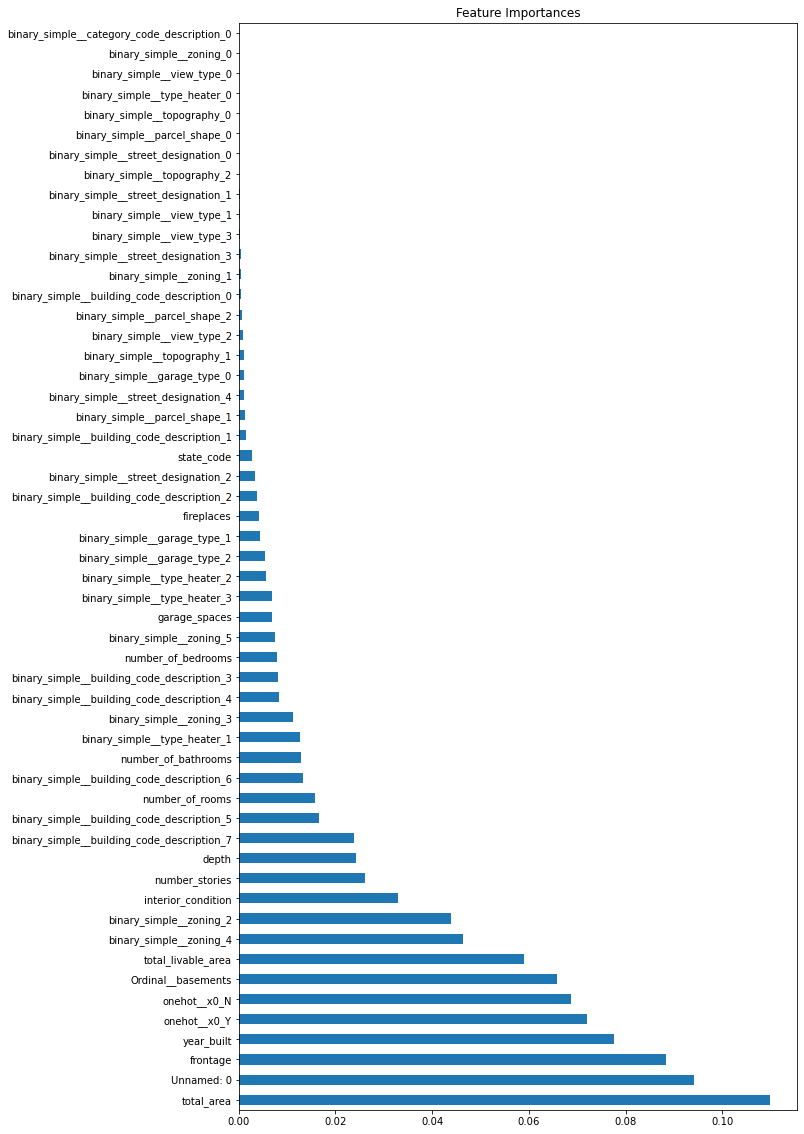

In [29]:
# Plot feature importances
plt.figure(figsize=(10,20))
feature_imp = pd.Series(rf_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False)
feature_imp.plot(kind='barh', title='Feature Importances');


### **Conclusion**

Berdasarkan pemodelan yang sudah dilakukan, cukup banyak fitur-fitur yang digunakan berpengaruh pada target 'Market Value'.

 Metrik evaluasi yang digunakan pada model adalah nilai RMSE & MAE. Jika ditinjau dari nilai RandomForest setelah dilakukan hyperparameter tuning yaitu sebesar ________, kita dapat menyimpulkan bahwa model dapat memperkirakan market value properti baru di Philadelphia pada nilai maksimal sebesar $390.400 dengan perkiraan error market value rata-rata akan meleset plus minus $_____ dari harga yang mungkin seharusnya. Namun tidak menutup kemungkinan juga prediksinya meleset tetapi tidak begitu jauh karena bias yang dihasilkan model dengan derajat kemiringan yang tidak begitu besar bila dilihat dari visualisasi antara harga aktual dan prediksi.



Hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

1. Mengecek prediksi mana saja yang memiliki nilai error yang tinggi. Kita dapat mengelompokkan error tersebut ke dalam grup overestimation dan underestimation, lalu memilih 5% error paling ekstrim saja untuk tiap grup. Nantinya pengelompokkan akan menjadi 3 grup, yaitu overestimation (5%), underestimation (5%), dan grup mayoritas yang error-nya mendekati nilai mean (90%). Setelahnya kita bisa mengecek hubungan antara error tersebut dengan tiap variabel independen. Pada akhirnya kita dapat mengetahui sebenarnya variabel mana saja dan aspek apa yang menyebabkan model menghasilkan error yang tinggi, sehingga kita bisa melakukan training ulang dengan penerapan feature engineering lainnya.
<br><br>   
2. Jika memungkinkan, pengurangan fitur yang tidak begitu korelatif dan juga perbaikan data isian dataset untuk OPA Philadelphia tentu akan dapat mengimprovisasi kapasitas prediksi dari model.
<br><br>     
3. Model yang sudah dibangun ini bisa dimanfaatkan untuk memprediksi market value untuk kategori properti lainnya. Contohnya seperti pembuatan model untuk multiple families,commersials, dan industries.

****

#### **Save Model**

In [25]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Model_Market_Value_Prediction_XGB.sav', 'wb'))

In [26]:
# Load model
filename = 'Model_Market_Value_Prediction_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

### Prediksi data baru

In [45]:
# Coba prediksi data baru
new_data = pd.DataFrame({
    'Unnamed: 0':[0],	
    'basements': ['G'], 
    'building_code_description': ['ROW 2 STY MASONRY'],	
    'category_code_description':['Single Family'],
    'central_air': ['N'],	
    'depth': [60.00],	
    'fireplaces': [0],	
    'frontage': [15.00],
    'garage_spaces': [4.00],
    'garage_type': ['T'],
    'interior_condition': [6],
    'number_of_bathrooms': [3],
    'number_of_bedrooms': [5],
    'number_of_rooms': [5],
    'number_stories': [2],
    'parcel_shape': ['E'],
    'state_code': [1001.0],
    'street_designation': ['ST'],
    'topography': ['A'],
    'total_area': [1606],
    'total_livable_area': [166],
    'type_heater': ['C'],
    'view_type': ['C'],
    'year_built': [1995],
    'zoning': ['RSA5']
})

new_data

,Unnamed: 0,basements,building_code_description,category_code_description,central_air,depth,fireplaces,frontage,garage_spaces,garage_type,interior_condition,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,parcel_shape,state_code,street_designation,topography,total_area,total_livable_area,type_heater,view_type,year_built,zoning
0,0,G,ROW 2 STY MASONRY,Single Family,N,60.0,0,15.0,4.0,T,6,3,5,5,2,E,1001.0,ST,A,1606,166,C,C,1995,RSA5


In [46]:
# Predict new_data
loaded_model.predict(new_data)

array([138965.45], dtype=float32)